# **Market Segment Analysis - Online Booking Vehicle**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vehicle=pd.read_csv("car data.csv")

**EDA**

In [4]:
vehicle.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [5]:
vehicle.tail(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
vehicle.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
vehicle.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
vehicle.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
vehicle.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
vehicle.duplicated().sum()

2

In [12]:
class_counts = vehicle['Selling_Price'].value_counts()

all_classes_equal = (class_counts == class_counts.iloc[0]).all()

if all_classes_equal:
    print("All unique classes have an equal number of instances.")
else:
    print("Not all unique classes have an equal number of instances.")
    print("Class Counts:")
    print(class_counts)

Not all unique classes have an equal number of instances.
Class Counts:
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64


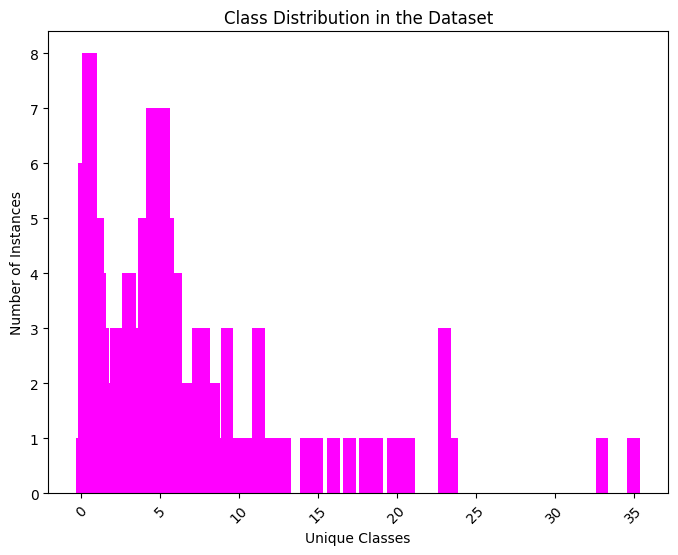

In [13]:
class_counts = vehicle['Selling_Price'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color='magenta')
plt.xlabel('Unique Classes')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45)
plt.show()

**Checking for Correlated Features using HEATMAP**

In [16]:
import datetime
date_time = datetime.datetime.now()
print(date_time)
vehicle['Age']=date_time.year - vehicle['Year']

2023-10-09 09:12:34.004217


In [18]:
vehicle.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6


In [19]:
vehicle_df = pd.DataFrame(vehicle[['Present_Price', 'Kms_Driven','Age', 'Selling_Price']])

In [20]:
vehicle_corr = vehicle_df.corr()
vehicle_corr

,Present_Price,Kms_Driven,Age,Selling_Price
Present_Price,1.000000,0.203647,0.047584,0.878983
Kms_Driven,0.203647,1.000000,0.524342,0.029187
Age,0.047584,0.524342,1.000000,-0.236141
Selling_Price,0.878983,0.029187,-0.236141,1.000000


<Axes: >

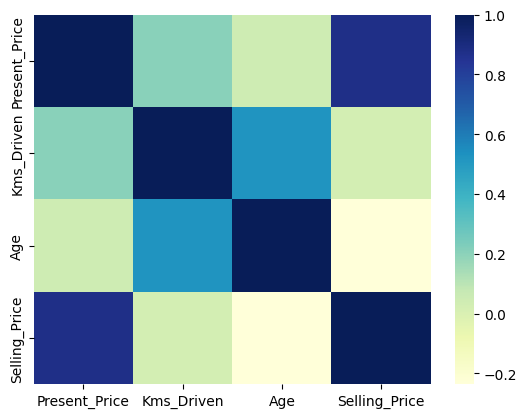

In [21]:
sns.heatmap(vehicle_corr, cmap = 'YlGnBu')

In [22]:
vehicle.shape

(301, 10)

In [23]:
vehicle = vehicle.drop_duplicates()
vehicle = vehicle.reset_index(drop=True)

In [24]:
vehicle.duplicated().sum()

0

**Binary Coding**

In [25]:
vehicle_dataset = vehicle

In [26]:
vehicle_dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [27]:
vehicle_dataset['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [28]:
vehicle_dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [29]:
vehicle_dataset['Owner'].unique()

array([0, 1, 3])

In [30]:
vehicle_dataset['Fuel_Type'] = vehicle_dataset['Fuel_Type'].map({'Petrol':2,'Diesel':1,'CNG':0})

In [31]:
vehicle_dataset['Seller_Type'] = vehicle_dataset['Seller_Type'].map({'Dealer':0,'Individual':1})

In [32]:
vehicle_dataset['Transmission'] = vehicle_dataset['Transmission'].map({'Manual':0,'Automatic':1})

In [33]:
vehicle_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,2,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,10
2,ciaz,2017,7.25,9.85,6900,2,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,2,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,9


**Adjustment in Selling Price with the Car data - Outlier detection**

<Axes: >

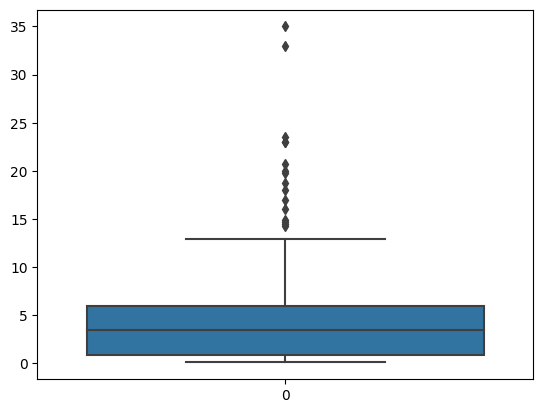

In [34]:
sns.boxplot(vehicle_dataset['Selling_Price'])

In [35]:
sorted_price = sorted(vehicle_dataset['Selling_Price'], reverse = True)
print(sorted_price[:10])

[35.0, 33.0, 23.5, 23.0, 23.0, 20.75, 19.99, 19.75, 18.75, 18.0]


In [36]:
vehicle_dataset[(vehicle_dataset['Selling_Price']>=33.0) & (vehicle_dataset['Selling_Price']<=35.0)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
63,fortuner,2017,33.0,36.23,6000,1,0,1,0,6
85,land cruiser,2010,35.0,92.60,78000,1,0,0,0,13


In [37]:
vehicle_dataset = vehicle_dataset[~(vehicle_dataset['Selling_Price']>=33.0) & (vehicle_dataset['Selling_Price']<=35.0)]

<Axes: >

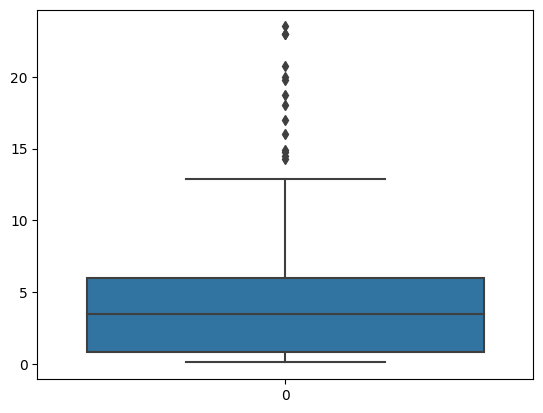

In [38]:
sns.boxplot(vehicle_dataset['Selling_Price'])

**Feature Scaling**

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vehicle_dataset[['Age','Kms_Driven','Selling_Price','Present_Price']]=scaler.fit_transform(vehicle_dataset[['Age','Kms_Driven','Selling_Price','Present_Price']])

<ipython-input-39-f68dd0342362>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_dataset[['Age','Kms_Driven','Selling_Price','Present_Price']]=scaler.fit_transform(vehicle_dataset[['Age','Kms_Driven','Selling_Price','Present_Price']])


In [40]:
X=vehicle_dataset.drop(["Car_Name","Selling_Price"],axis=1)
Y=vehicle_dataset["Selling_Price"]

In [42]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014       0.147868    0.053053          2            0             0   
1    2013       0.258698    0.085085          1            0             0   
2    2017       0.267396    0.012813          2            0             0   
3    2011       0.107464    0.009409          2            0             0   
4    2014       0.183782    0.083984          1            0             0   
..    ...            ...         ...        ...          ...           ...   
294  2016       0.316498    0.067043          1            0             0   
295  2015       0.156566    0.119119          2            0             0   
296  2009       0.299663    0.175043          2            0             0   
297  2017       0.341751    0.017017          1            0             0   
298  2016       0.156566    0.009938          2            0             0   

     Owner       Age  
0        0  0.266667  
1        0  0.333

In [43]:
print(Y)

0      0.138889
1      0.198718
2      0.305556
3      0.117521
4      0.192308
         ...   
294    0.401709
295    0.166667
296    0.138889
297    0.487179
298    0.222222
Name: Selling_Price, Length: 297, dtype: float64


Splitting Train and Test Data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

**DECISION TREE**

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [46]:
print("Training accuracy of the model is {:.2f}".format(tree.score(X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(tree.score(X_test, Y_test)))

Training accuracy of the model is 1.00
Testing accuracy of the model is 0.88


In [47]:
training_data_predction = tree.predict(X_train)
r_train_score1 = metrics.r2_score(Y_train, training_data_predction)
print("R squared score of Training Set : ", r_train_score1)

R squared score of Training Set :  1.0


In [48]:
test_data_predction = tree.predict(X_test)
r_test_score1 = metrics.r2_score(Y_test, test_data_predction)
print("R squared score of Test Set : ", r_test_score1)

R squared score of Test Set :  0.8781871271779731


In [49]:
ex_test_score1 = metrics.explained_variance_score(Y_test, test_data_predction)
print("Explained Variance score of Test Set : ", ex_test_score1)

Explained Variance score of Test Set :  0.8786754566470912


In [50]:
mae_test_score1 = metrics.mean_absolute_error(Y_test, test_data_predction)
print("Mean Absolute Error score of Test Set : ", mae_test_score1)

Mean Absolute Error score of Test Set :  0.035408357075023746


**LINEAR REGRESSION**

In [51]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression()

In [52]:
print("Training accuracy of the model is {:.2f}".format(linear.score(X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(linear.score(X_test, Y_test)))

Training accuracy of the model is 0.91
Testing accuracy of the model is 0.69


In [53]:
training_data_predction = linear.predict(X_train)
r_train_score2 = metrics.r2_score(Y_train, training_data_predction)
print("R squared score of Training Set : ", r_train_score2)

R squared score of Training Set :  0.9067549826629185


In [54]:
test_data_predction = linear.predict(X_test)
r_test_score2 = metrics.r2_score(Y_test, test_data_predction)
print("R squared score of Test Set : ", r_test_score2)

R squared score of Test Set :  0.6900844531089548


In [55]:
ex_test_score2 = metrics.explained_variance_score(Y_test, test_data_predction)
print("Explained Variance score of Test Set : ", ex_test_score2)

Explained Variance score of Test Set :  0.6912385649969819


In [56]:
mae_test_score2 = metrics.mean_absolute_error(Y_test, test_data_predction)
print("Mean Absolute Error score of Test Set : ", mae_test_score2)

Mean Absolute Error score of Test Set :  0.057402492135565045


**GRADIENT BOOST REGRESSOR**

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor()
grad.fit(X_train,Y_train)

GradientBoostingRegressor()

In [58]:
print("Training accuracy of the model is {:.2f}".format(grad.score(X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(grad.score(X_test, Y_test)))

Training accuracy of the model is 1.00
Testing accuracy of the model is 0.94


In [59]:
training_data_predction = grad.predict(X_train)
r_train_score3 = metrics.r2_score(Y_train, training_data_predction)
print("R squared score of Training Set : ", r_train_score3)

R squared score of Training Set :  0.9972094994289187


In [60]:
test_data_predction = grad.predict(X_test)
r_test_score3 = metrics.r2_score(Y_test, test_data_predction)
print("R squared score of Test Set : ", r_test_score3)

R squared score of Test Set :  0.9428316639727399


In [61]:
ex_test_score3 = metrics.explained_variance_score(Y_test, test_data_predction)
print("Explained Variance score of Test Set : ", ex_test_score3)

Explained Variance score of Test Set :  0.9428489335016905


In [62]:
mae_test_score3 = metrics.mean_absolute_error(Y_test, test_data_predction)
print("Mean Absolute Error score of Test Set : ", mae_test_score3)

Mean Absolute Error score of Test Set :  0.028016880490575474


**RIDGE REGRESSION**

In [63]:
from sklearn.linear_model import Ridge
rid= Ridge()
rid.fit(X_train, Y_train)

Ridge()

In [64]:
print("Training accuracy of the model is {:.2f}".format(rid.score(X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(rid.score(X_test, Y_test)))

Training accuracy of the model is 0.89
Testing accuracy of the model is 0.80


In [65]:
training_data_predction = rid.predict(X_train)
r_train_score4 = metrics.r2_score(Y_train, training_data_predction)
print("R squared score of Training Set : ", r_train_score4)

R squared score of Training Set :  0.8860466681500032


In [66]:
test_data_predction = rid.predict(X_test)
r_test_score4 = metrics.r2_score(Y_test, test_data_predction)
print("R squared score of Test Set : ", r_test_score4)

R squared score of Test Set :  0.8012386724695831


In [67]:
ex_test_score4 = metrics.explained_variance_score(Y_test, test_data_predction)
print("Explained Variance score of Test Set : ", ex_test_score4)

Explained Variance score of Test Set :  0.8016319245571636


In [68]:
mae_test_score4 = metrics.mean_absolute_error(Y_test, test_data_predction)
print("Mean Absolute Error score of Test Set : ", mae_test_score4)

Mean Absolute Error score of Test Set :  0.054846194627207655


**Visualization of the Trained Model**

In [72]:
model_data_r = pd.DataFrame({'Models':['DT','LR','GBR','RR'],
             "R-squared score":[r_test_score1,r_test_score2,r_test_score3,r_test_score4]})

In [74]:
model_data_r

,Models,R-squared score
0,DT,0.878187
1,LR,0.690084
2,GBR,0.942832
3,RR,0.801239


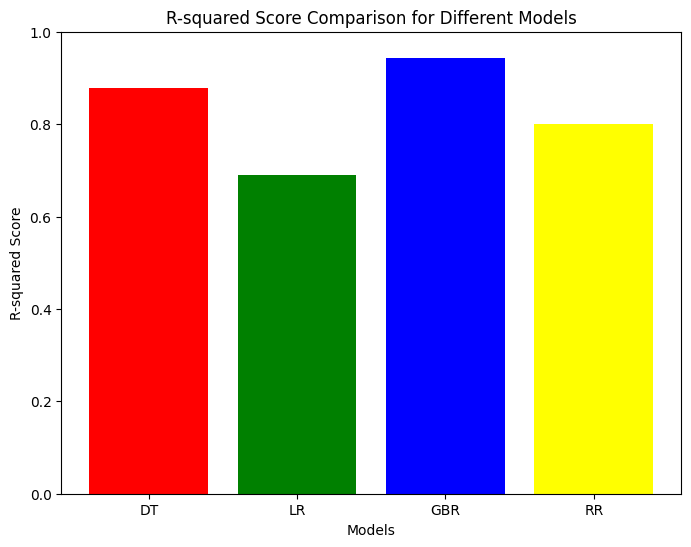

In [76]:
plt.figure(figsize=(8, 6))
plt.bar(model_data_r['Models'], model_data_r['R-squared score'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison for Different Models')
plt.ylim(0, 1)
plt.show()

In [77]:
model_data_v = pd.DataFrame({'Models':['DT','LR','GBR','RR'],
             "Explained Variance Score":[ex_test_score1,ex_test_score2,ex_test_score3,ex_test_score4]})

In [78]:
model_data_v

,Models,Explained Variance Score
0,DT,0.878675
1,LR,0.691239
2,GBR,0.942849
3,RR,0.801632


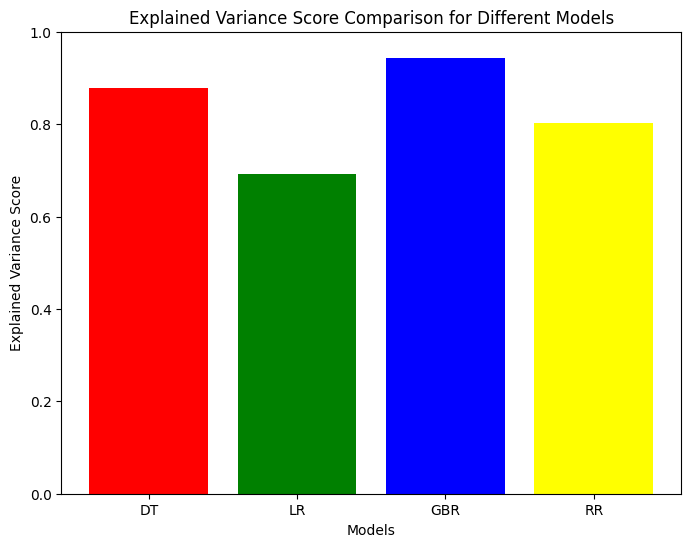

In [79]:
plt.figure(figsize=(8, 6))
plt.bar(model_data_v['Models'], model_data_v['Explained Variance Score'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Explained Variance Score')
plt.title('Explained Variance Score Comparison for Different Models')
plt.ylim(0, 1)
plt.show()

In [80]:
model_data_mae = pd.DataFrame({'Models':['DT','LR','GBR','RR'],
             "Mean Absolute Error score":[mae_test_score1,mae_test_score2,mae_test_score3,mae_test_score4]})

In [81]:
model_data_mae

,Models,Mean Absolute Error score
0,DT,0.035408
1,LR,0.057402
2,GBR,0.028017
3,RR,0.054846


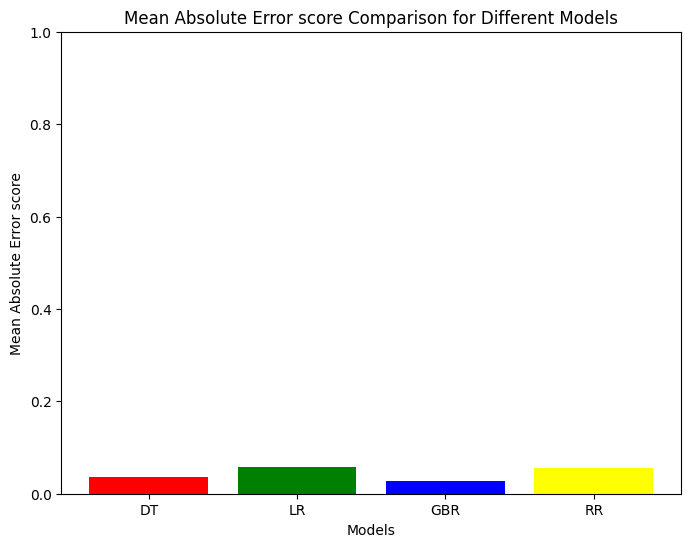

In [82]:
plt.figure(figsize=(8, 6))
plt.bar(model_data_mae['Models'], model_data_mae['Mean Absolute Error score'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error score')
plt.title('Mean Absolute Error score Comparison for Different Models')
plt.ylim(0, 1)
plt.show()

The Machine Learning model is best choosed based on the High Accuracy value and low error value